# Libraries

In [1]:
!pip install beautifulsoup4

You are using pip version 19.0.3, however version 20.3.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import random
import json
import matplotlib.pyplot as plt
import statsmodels.api as sm
import requests
import re
from pathlib import Path
from bs4 import BeautifulSoup
import seaborn as sb
plt.rcParams['figure.figsize'] = [15, 7] # For bigger plots
plt.style.use('fivethirtyeight') # Special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline

# Gather

In [3]:
twitter_data_file = "twitter-archive-enhanced.csv"
tweet_metadata_file = "tweet-json.txt"
image_predictions_file = "image-predictions.tsv"

In [4]:
tweet_df = pd.read_csv(twitter_data_file)
tweet_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1365,702684942141153280,NaN,NaN,2016-02-25 02:42:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's sick of these bullshit gen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702684942...,11,10,Lucy,None,None,None,None
1580,687127927494963200,NaN,NaN,2016-01-13 04:23:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gordon. He's an asshole. 9/10 would still...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687127927...,9,10,Gordon,None,None,None,None
1593,686386521809772549,NaN,NaN,2016-01-11 03:17:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Crimson. He's a Speckled Winnebag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686386521...,11,10,Crimson,None,None,None,None
631,794205286408003585,NaN,NaN,2016-11-03 15:51:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Laika. She was a space pupper. The fir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794205286...,14,10,Laika,None,None,pupper,None
1419,698342080612007937,NaN,NaN,2016-02-13 03:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maximus. He's training for the tetherb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698342080...,11,10,Maximus,None,None,None,None


In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweet_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

'import tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.tw

In [6]:
# Accessing json file
list_of_dicts = []
with open(tweet_metadata_file, 'r') as f:
    for line in f:
        # convert json line to dict
        data = json.loads(line)
        # append dict to list
        list_of_dicts.append(data)

In [7]:
tweet_metadata_df = pd.DataFrame(list_of_dicts)

In [8]:
# Downloading the file "image-predictions"
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# if the file does not exist, download it
if not Path(image_predictions_file).is_file():
    r = requests.get(url, allow_redirects=True)
    with Path(image_predictions_file).open('wb') as f:
        f.write(r.content)

In [9]:
image_predictions_df = pd.read_csv(image_predictions_file, sep='\t')

# Assessing Data 

In this section, we will check the loaded data for quality and tidiness issues

In [10]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
tweet_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [12]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
# Checking how many id columns files have-there are less ids in image-predictions
image_predictions_df["tweet_id"].nunique()

2075

In [15]:
tweet_metadata_df["id"].nunique()

2354

In [16]:
tweet_df["tweet_id"].nunique()

2356

In [17]:
# Checking the values of numerator and denominator so we can delete the rows that don't satisfy the 
# conditions mentioned in project instructions 
tweet_df["rating_denominator"].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [18]:
tweet_df["rating_numerator"].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [19]:
tweet_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
# Finding columns whose all three predictions are wrong-they are not dogs
(
    (image_predictions_df["p1_dog"] == False) & 
    (image_predictions_df["p2_dog"] == False) & 
    (image_predictions_df["p3_dog"] == False)
).sum()

324

## Quality issues

* Number of rows does not match for all the dataframes
* tweet_metadata_df has duplicate column (id, id_str) column 
* image_predictions_df contains less users than tweet_df, meaning it is missing around 300 of users
* tweet_df column "rating_numerator" contains values much greater than 10, for example 1776, 666, but also much smaller, like 2 or 5, which is wrong according to the data description
* tweet_df column "rating_denominator" contains values greater than 10, for example 170, 150,  but also smaller, like 2 or 0 which is wrong according to the data description because value should be 10 in almost all cases
* Erroneous dog names like a, quite, life
* Some rows contain more than one dog type per dog
* tweet_metadata_df has a lot of columns with mostrly NaN values
* In image_predictions_df there exist rows where none of the 3 predictions are dogs - some contain words like vacuum, swab, toyshop

## Tidiness issues

* tweet_df column "source" starts with "<ahref" which is html language; we need only link starting with "http...", so we can get rid of the excess text and categorize the sources
* Some of the dogs are not well described. That is why there are None values in dog stages - whenever there is a key word - 'doggo, floofer, pupper or puppo' in description-it automatically puts the dog in one of the categories. If there is no key word in description, the dog can't be categorized in one of these 4 categories, or if the description contains more than one keywords, the dog will be included in more than one category of dog stages/types.

# Cleaning data

**Define**
Dropping the rows where denominator is not 10, and where numerator is smaller than 10 or bigger than 100


**Code**

In [21]:
tweet_df = tweet_df.drop(tweet_df[tweet_df['rating_denominator']!=10].index)
tweet_df = tweet_df.drop(tweet_df[tweet_df['rating_numerator']<10].index)
tweet_df = tweet_df.drop(tweet_df[tweet_df['rating_numerator']>100].index)

**Test**

In [22]:
tweet_df['rating_numerator'].unique()

array([13, 12, 14, 17, 11, 10, 15, 75, 27, 26], dtype=int64)

In [23]:
tweet_df['rating_denominator'].value_counts()

10    1894
Name: rating_denominator, dtype: int64

**Define**
Replace all the rows of dog names that contain some other word except for the name with 'No_name'.

**Code**

In [24]:
tweet_df['name'][tweet_df['name'].str.match('[a-z]+')] = 'No_name'
tweet_df['name'] = tweet_df['name'].fillna('No_name')

c:\users\amina lejla\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
tweet_df['name'].value_counts()

None       584
No_name     70
Charlie     12
Oliver      10
Cooper      10
          ... 
Simba        1
Lennon       1
Linda        1
Marvin       1
Cupid        1
Name: name, Length: 793, dtype: int64

**Define**
Splitting the column with dog description into two columns - description and link

**Code**

In [26]:
tweet_df['description'] = tweet_df['text'].map(lambda x: x[:x.find('http')])

In [27]:
tweet_df['link'] = tweet_df.text.map(lambda x: x[x.find('http'):])

**Test*

In [28]:
tweet_df['description'].sample(1)

205    Meet Benny. He likes being adorable and making...
Name: description, dtype: object

In [29]:
tweet_df['link']

0       https://t.co/MgUWQ76dJU
1       https://t.co/0Xxu71qeIV
2       https://t.co/wUnZnhtVJB
3       https://t.co/tD36da7qLQ
4       https://t.co/AtUZn91f7f
                 ...           
2339    https://t.co/11LvqN4WLq
2343    https://t.co/Yk6GHE9tOY
2345    https://t.co/RhUEAloehK
2348    https://t.co/rdivxLiqEt
2350    https://t.co/fvIbQfHjIe
Name: link, Length: 1894, dtype: object

**Define**
Categorizing the source of tweet and parsing the text

**Code**

In [30]:
tweet_df['source_category'] = tweet_df.source.map(lambda x: BeautifulSoup(x, 'html.parser').a.string)
tweet_df['source_category'] = tweet_df['source_category'].astype('category')

**Test**

In [31]:
tweet_df['source_category'].value_counts()

Twitter for iPhone     1780
Vine - Make a Scene      84
Twitter Web Client       21
TweetDeck                 9
Name: source_category, dtype: int64

**Define**
 Dropping columns 
 Reason: retweets are duplicates and they don't contain new information

**Code**

In [32]:
tweet_df = tweet_df.drop(['retweeted_status_id', 'source', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'text'], axis=1)

**Test**

In [33]:
tweet_df.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,description,link,source_category
61,880221127280381952,NaN,NaN,2017-06-29 00:27:25 +0000,https://twitter.com/dog_rates/status/880221127...,12,10,Jesse,None,None,None,None,Meet Jesse. He's a Fetty Woof. His tongue ejec...,https://t.co/fUod0tVmvK,Twitter for iPhone


**Define**
Convert timestamp to datetime

**Code**

In [34]:
tweet_df['timestamp'] = pd.to_datetime(tweet_df['timestamp'])

**Test**

In [36]:
tweet_df.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                datetime64[ns, UTC]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
description                           object
link                                  object
source_category                     category
dtype: object

Some of the dogs have more than one stage per dog, but changing that wouldn't affect our data a lot because most of the dogs have None values for dog stages.

In [37]:
tweet_df['doggo'].value_counts()

None     1802
doggo      92
Name: doggo, dtype: int64

In [38]:
tweet_df['floofer'].value_counts()

None       1884
floofer      10
Name: floofer, dtype: int64

In [39]:
tweet_df['pupper'].value_counts()

None      1680
pupper     214
Name: pupper, dtype: int64

**Define**
Renaming id column so that we can join the tables on that column

**Code**

In [40]:
tweet_metadata_df = tweet_metadata_df.rename(columns={'id': 'tweet_id'})

**Test**

In [41]:
tweet_metadata_df.sample(1)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2104,Sat Nov 28 05:05:47 +0000 2015,670468609693655041,670468609693655041,This is Edd. He's a Czechoslovakian Googolplex...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670468602584256512, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,375,False,False,False,False,en,NaN,NaN,NaN,NaN


**Define**
Json file - Dropping the columns that repeat or have too many NaN values

**Code**

In [42]:
tweet_metadata_df = tweet_metadata_df.drop(['created_at', 'id_str', 'full_text', 'truncated', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'], axis=1)

**Test**

In [43]:
tweet_metadata_df.sample(1) 

,tweet_id,display_text_range,retweet_count,favorite_count
6,890971913173991426,"[0, 140]",2158,12041


**Define**
Remove rows for which all 3 predictions are not dogs and create a column "dog_breed", that will contain kind of a dog based on value of prediction and if tested positive for dog

**Code**

In [44]:
image_predictions_df = image_predictions_df[~(
    (image_predictions_df["p1_dog"] == False) & 
    (image_predictions_df["p2_dog"] == False) & 
    (image_predictions_df["p3_dog"] == False)
)]

In [45]:
def dog_selection(row):
    if row["p1_dog"] is True:
        return row["p1"]
    elif row["p2_dog"] is True:
        return row["p2"]
    else:
        return row["p3"]

image_predictions_df['dog_breed'] = image_predictions_df.apply(dog_selection, axis=1)

In [46]:
# Now that we grouped all dog breed into one column, we can delete the unnecessary columns
image_predictions_df = image_predictions_df.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog',  'p3', 'p3_conf', 'p3_dog'], axis = 1)

**Test**

In [47]:
image_predictions_df.sample(1)

,tweet_id,jpg_url,img_num,dog_breed
352,672538107540070400,https://pbs.twimg.com/media/CVVV1wJWoAEcOyk.jpg,1,Chihuahua


## Final clean dataset

In [48]:
# Combining all three dataframes into one
twitter_archive_master_df = pd.merge(
    tweet_df,
    tweet_metadata_df,
    how="inner",
    on='tweet_id',
)
twitter_archive_master_df = pd.merge(
    twitter_archive_master_df,
    image_predictions_df,
    how="inner",
    on='tweet_id',
)

In [49]:
twitter_archive_master_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,puppo,description,link,source_category,display_text_range,retweet_count,favorite_count,jpg_url,img_num,dog_breed
1189,676613908052996102,NaN,NaN,2015-12-15 04:05:01+00:00,https://twitter.com/dog_rates/status/676613908...,12,10,No_name,None,None,...,None,This is the saddest/sweetest/best picture I've...,https://t.co/vQ2Lw1BLBF,Twitter for iPhone,"[0, 90]",219,1183,https://pbs.twimg.com/media/CWPQwmJWUAAu_At.jpg,1,Doberman
145,853760880890318849,NaN,NaN,2017-04-17 00:03:50+00:00,https://twitter.com/dog_rates/status/853760880...,12,10,Alice,None,None,...,None,Say hello to Alice. I'm told she enjoys car ri...,https://t.co/yT4vw8y77x,Twitter for iPhone,"[0, 118]",6403,30414,https://pbs.twimg.com/media/C9kq_bbVwAAuRZd.jpg,1,miniature_pinscher
911,706681918348251136,NaN,NaN,2016-03-07 03:24:33+00:00,https://twitter.com/dog_rates/status/706681918...,12,10,Katie,None,None,...,None,Say hello to Katie. She's a Mitsubishi Hufflep...,https://t.co/CFPIcGcwJv,Twitter for iPhone,"[0, 135]",1103,3627,https://pbs.twimg.com/media/Cc6jcYRXIAAFuox.jpg,1,toy_poodle
825,719339463458033665,NaN,NaN,2016-04-11 01:41:07+00:00,https://twitter.com/dog_rates/status/719339463...,10,10,Lucy,None,None,...,None,Say hello to Lucy and Sophie. They think they'...,https://t.co/HW50zkcf2R,Twitter for iPhone,"[0, 122]",1403,4822,https://pbs.twimg.com/media/Cfuba6NW4AIeMHk.jpg,1,golden_retriever
541,778039087836069888,NaN,NaN,2016-09-20 01:12:28+00:00,https://twitter.com/dog_rates/status/778039087...,12,10,None,None,None,...,None,Evolution of a pupper yawn featuring Max. 12/1...,https://t.co/t8Y4x9DmVD,Twitter for iPhone,"[0, 68]",3065,9417,https://pbs.twimg.com/media/CswmaHmWAAAbdY9.jpg,2,German_shepherd


In [50]:
twitter_archive_master_df.to_csv("twitter_archive_master.csv")

In [51]:
# Create a copy of df for analysis
df = twitter_archive_master_df.copy()

In [52]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'description', 'link',
       'source_category', 'display_text_range', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'dog_breed'],
      dtype='object')

In [53]:
df['name'].value_counts()

None        361
No_name      51
Charlie      10
Lucy         10
Tucker        9
           ... 
Marley        1
Karma         1
Tycho         1
Penelope      1
Snoopy        1
Name: name, Length: 721, dtype: int64

# Visualization

#### Top 10 dog breeds

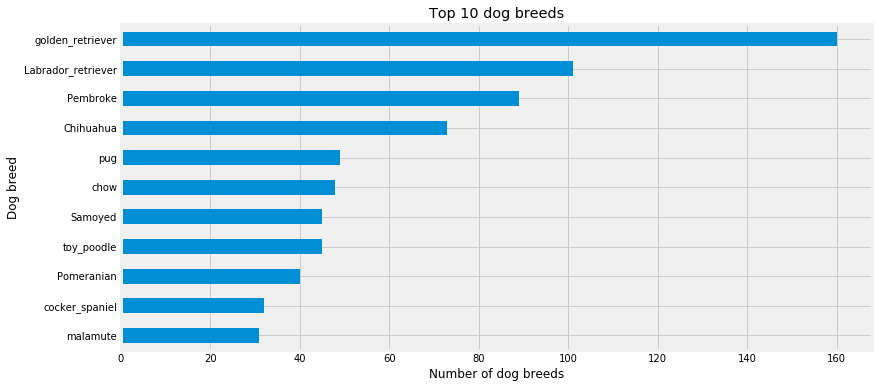

In [54]:
df['dog_breed'].value_counts()[10::-1].plot(kind='barh', figsize=(12,6));
plt.ylabel('Dog breed')
plt.xlabel('Number of dog breeds')
plt.title('Top 10 dog breeds');
plt.savefig('top_10_dog_breeds.png')

#### Number of likes vs dog breed

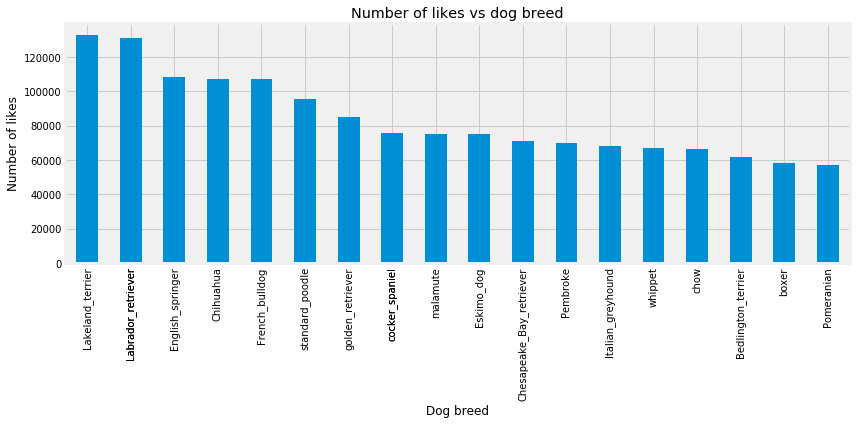

In [55]:
# Let's see which dog breeds have the most likes 
most_liked_dog_breed = df.sort_values(['favorite_count'], ascending = False).head(20)
most_liked_dog_breed = most_liked_dog_breed.reset_index()
most_liked_dog_breed.plot(x='dog_breed', y='favorite_count', kind='bar', figsize=(12,6), legend=None);
plt.ylabel('Number of likes')
plt.xlabel('Dog breed')
plt.title('Number of likes vs dog breed');
plt.tight_layout()
plt.savefig("Number of likes vs dog breed.png")

#### Number of retweets vs dog breed

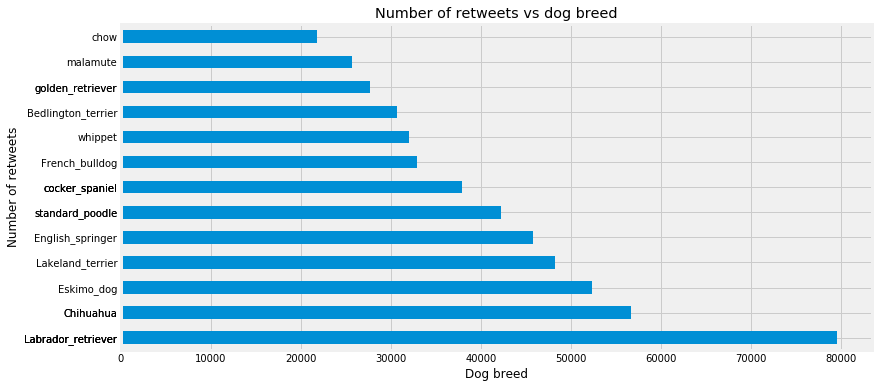

In [56]:
# Let's see which dog breeds have the most retweets
most_retweeted_dog_breed = df.sort_values(['retweet_count'], ascending = False).head(20)
most_retweeted_dog_breed = most_retweeted_dog_breed.reset_index()
most_retweeted_dog_breed.plot(x='dog_breed', y='retweet_count', kind='barh', figsize=(12,6), legend=None);
plt.ylabel('Number of retweets')
plt.xlabel('Dog breed')
plt.title('Number of retweets vs dog breed');
plt.savefig("Number of retweets vs dog breed.png")

#### Let's observe retweets number over the years

In [57]:
df['year'] = df['timestamp'].dt.year
df.groupby('year')['retweet_count'].sum()/df['retweet_count'].sum()

year
2015    0.093063
2016    0.474654
2017    0.432283
Name: retweet_count, dtype: float64

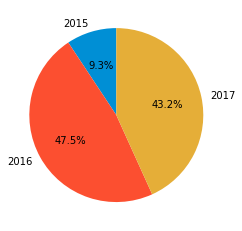

In [58]:
plt.pie(
    df.groupby('year')['retweet_count'].sum()/df['retweet_count'].sum(), 
    labels = sorted(df['year'].unique()),
    startangle=90,
    autopct='%1.1f%%'
);
plt.savefig("Retweets over the years.png")

#### Let's observe likes number over the years

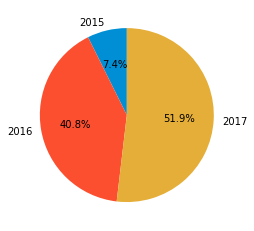

In [59]:
plt.pie(
    df.groupby('year')['favorite_count'].sum()/df['favorite_count'].sum(), 
    labels = sorted(df['year'].unique()),
    startangle=90,
    autopct='%1.1f%%'
);
plt.savefig("Likes over the years.png")

#### This is the relationship between the number of likes and number of retweets. As we can see, they are positively correlated

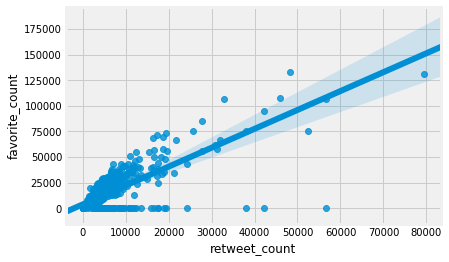

In [60]:
sb.regplot(data = df, x = 'retweet_count', y = 'favorite_count');
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.savefig("Correlation between number of retweets and number of likes.png")

#### Let's observe the number of tweets over time

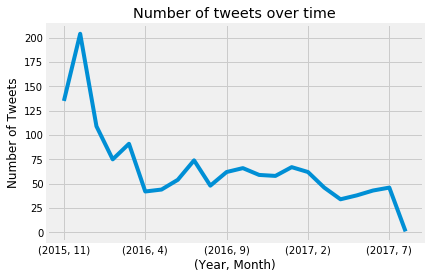

In [61]:
tweets_trend = df['tweet_id'].groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).count()
tweets_trend.plot(kind='line', title='Number of tweets over time')
plt.xlabel('(Year, Month)')
plt.ylabel('Number of Tweets')
plt.savefig('tweet_trend.png')

#### Lets find out the top 10 names for dogs

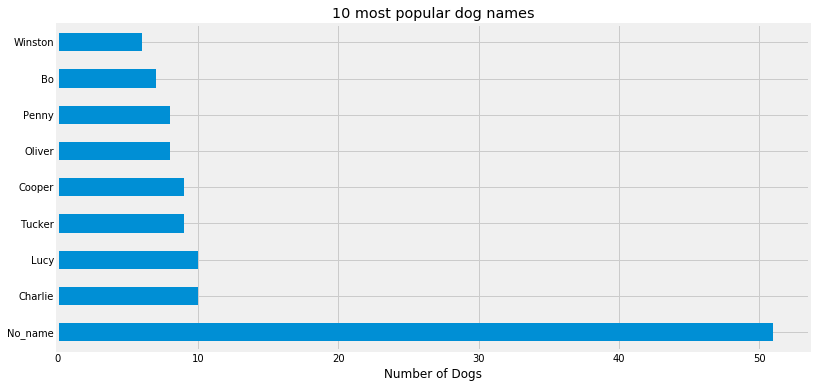

In [62]:
dog_breeds = df['name'].value_counts().drop(labels=['None', 'No_name'])
df['name'].value_counts()[1:10].plot(kind='barh', figsize=(12,6), title='10 most popular dog names').set_xlabel("Number of Dogs")
plt.savefig('top_10_dog_names.png')

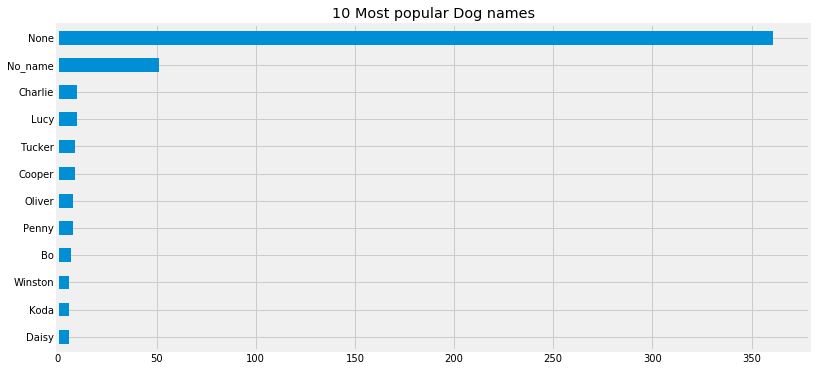

In [63]:
# Most common names for dogs
dog_breeds = df['name'].value_counts().drop(labels=['None', 'No_name'])
plt.title("10 Most popular Dog names")
df['name'].value_counts()[11::-1].plot(kind='barh', figsize=(12,6));
plt.savefig('Top_10_dog_names.png')